<h1 style="font-size:60px; 
           color:green;
           text-align:center">
    PROYECTO CIENCIA DE DATOS</h1>

# Table of Contents

* [__Proyecto final 0__](#chapter1)
    * [__Presentacion 0.1__](#section_0_1)
* [__Objetivo 1__](#section_1)
* [__Contexto analitico 2__](#section_2)
* [__Data Acquisition 3__](#section_3)
* [__Exploratory Data Analysis 4__](#section_4)
* [__Data Wrangling 5__](#section_5)
* [__Feature selection 6__](#section_6) 
* [__Machine Learning 7__](#section_7)
* [__Conlusion 8__](#section_8)
* [__Futuras lineas 9__](#section_9)

---

# 0. Proyecto final 

## Presentacion 0.1

_¿Cual es la probabilidad que tengo de ganar o perder una partida de un videojuego?_ Esta, es la pregunta principal que vamos a investigar a lo largo de este proyecto. El juego Leagoe of Legend consta de dos equipos 5 vs 5 que el objetivo de cada equipo es destruir la base enemiga. Para esto, el mapa se compone por tres lineas en las cuales iran los jugadores. Existen multiples personajes para jugar en cada partida que reciben el nombre de campeones. Estos últimos se diferencias por categorias, role, funcion y habilidades. Dependiendo de cada campeon, tiene un impacto distinto en la partida. Entonces... ¿Como vamos a realizar este proyecto? Para el mismo, se considerara el historial de juego de un jugador en especifico y de esta forma realizaremos predicciones en base a las caracterisitcas de juego de este. 

# 1. Objetivo 

_¿Cual es la probabilidad de ganar o perder?_ Como  vimos en el apartado anterior este es el objetivo de este proyecto. Se quiere investigar las mukltiples variables que disponemos dentro de las APIs del League Of Legends, de ahora en adelante lo llamaremos lol, para asi de esta forma encontrar la coneccion que tenemops entre ellas a lo largo del historial del jugador. En base al historial historico de un jugador, analizaremos todas sus partidas para comenzar a deducir patrones, aspectos que se compartan. Algunos de ellos pueden ser con quien juega acompañado por ejemplo, mientras que otros pueden ser conceptos mas tecnicos dentro del mismo juego como el nivel de farmeo (hace referencia a la cantidad de subditos que elimino) entre muchos otros. 

Para la resolucion de esta problematica existen alguns preguntas que pueden comenzar a guiar el proyecto en un rumbo. Debajo se dejara un listado con las mismas:

- ¿Cuantas partidas jugo el jugador en los ultimos 5 años?¿Cuantas por año?
- ¿Cual es el KDA (kill, deaths, assistants) del mismo?¿Como fue evolucionando en cada año?
- ¿Cuales son los campeones que más usa?¿Como evoluciono con cada uno (KDA con el campeon)?
- ¿Cuales son los campeones con mayor nivel de maestria que posee?
- ¿Cual es el nivel de farmeo del jugador?
- ¿Cual es el nivel de vision del mapa del jugador?
- ¿En que linea se desempeño mejor?¿Que clase de campeon empleo para ello?

# 2. Contexto analitico

Para este proyecto analizaremos el historial de partidas junto a otras caracteristicas de cada un jugador. Para obtener estos datos implementaremos el uso directo de las APIs proporcionadas por Riot Games (desarrolladora del juego). Entre ellas nos podemos encontrar los siguientes links que estaremos usando.

__Developers home page__
- https://developer.riotgames.com/

__APIs de Riot Games__
- https://developer.riotgames.com/apis#league-v4

__APIs information__
- https://developer.riotgames.com/docs/portal#_overview

Mediante el uso de estos 3 links vamos a extraer los datos que necesitaremos para realizar nuestro proyecto. A continuacion veremos una breve muestra de como funcionan.

Ingresando en el primer link obtenemos acceso a los datos principales de la cuenta como developers, en donde veremos nuestro API's Key para el acceso a los datos.

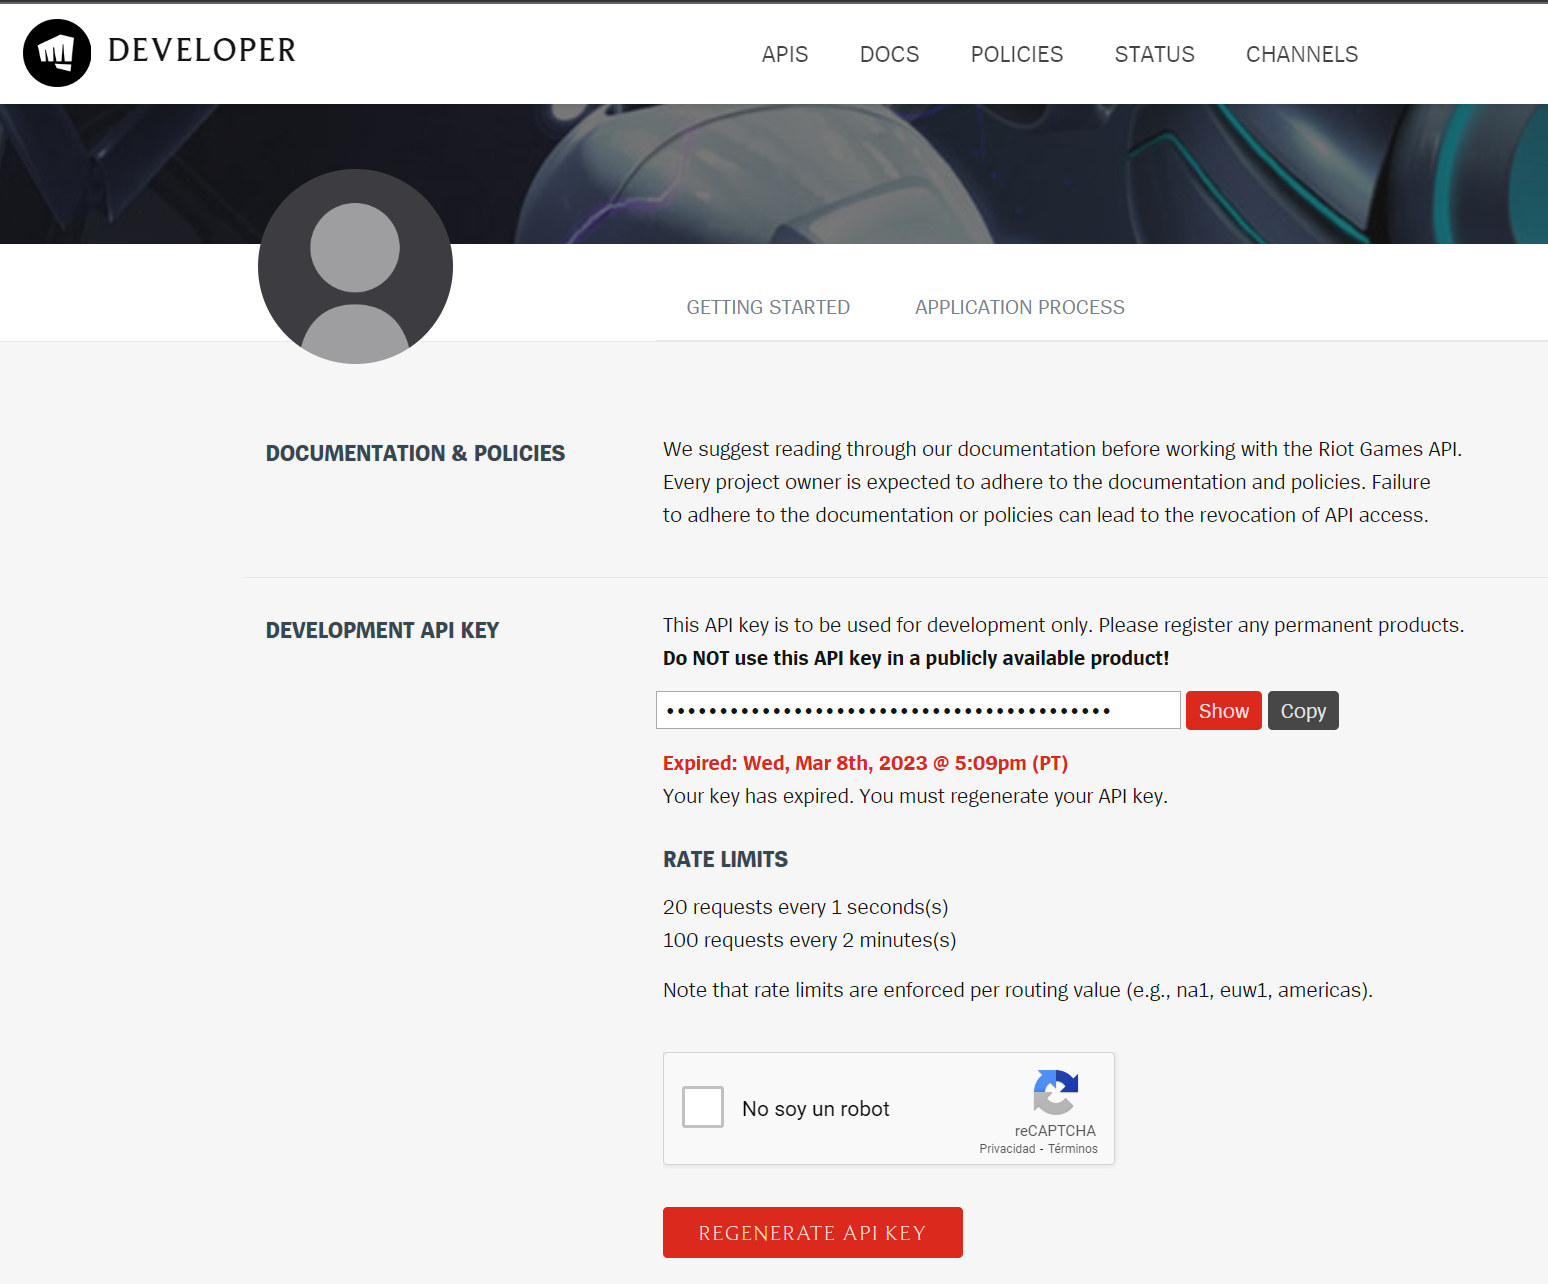

Con el segundo link lo que hacemos es obtener los accesos a todas las APi's que Riot nos ofrece entre las cuales podemos encontrar algunas como las siguientes.

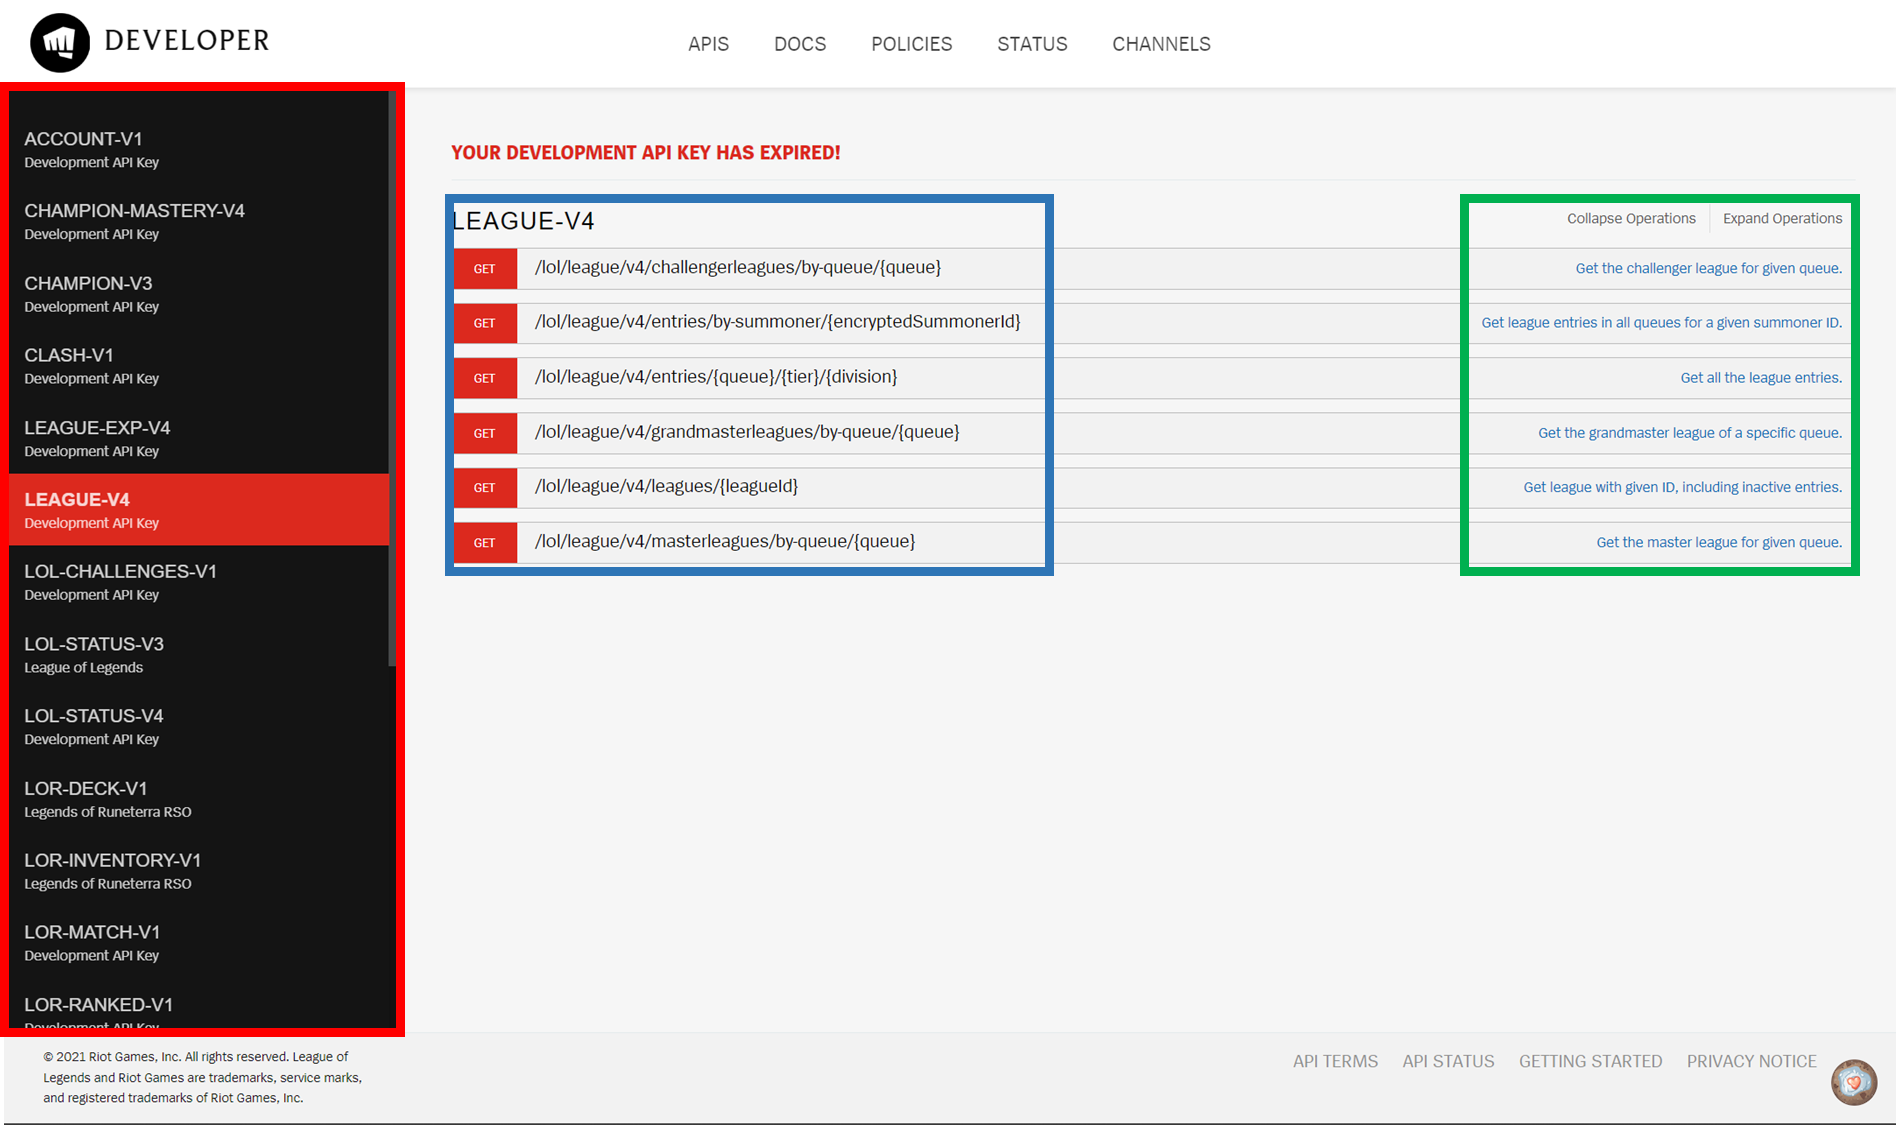

En esta imagen podemos ver tres recuadros:

- <span style="color:red">Rojo</span>: Tenemos un listado de todas las Apis que nos proporciona Riot Games para sus multiples juegos.
- <span style="color:green">Verde</span>: Tenemos una breve descripcion de los datos que podemos obtener en base a las APIs que nos brindan.
- <span style="color:blue">Azul</span>: Tenemos un listado de las conecciones e indicaciones de que requisitos se neceistan para acceder.

Mediante el uso de estas APIs que mostramos se obtendran todos los datos que haran falta para realizar la investigacion permitenente al proyecto. Todas estas APIs nos devuelven un archivo JSON el cual tendremos que ir trabajando para desarrollarlo como un pandas Data Frame t de esta forma poder trabajarlos.

# 3. Data acquisition 

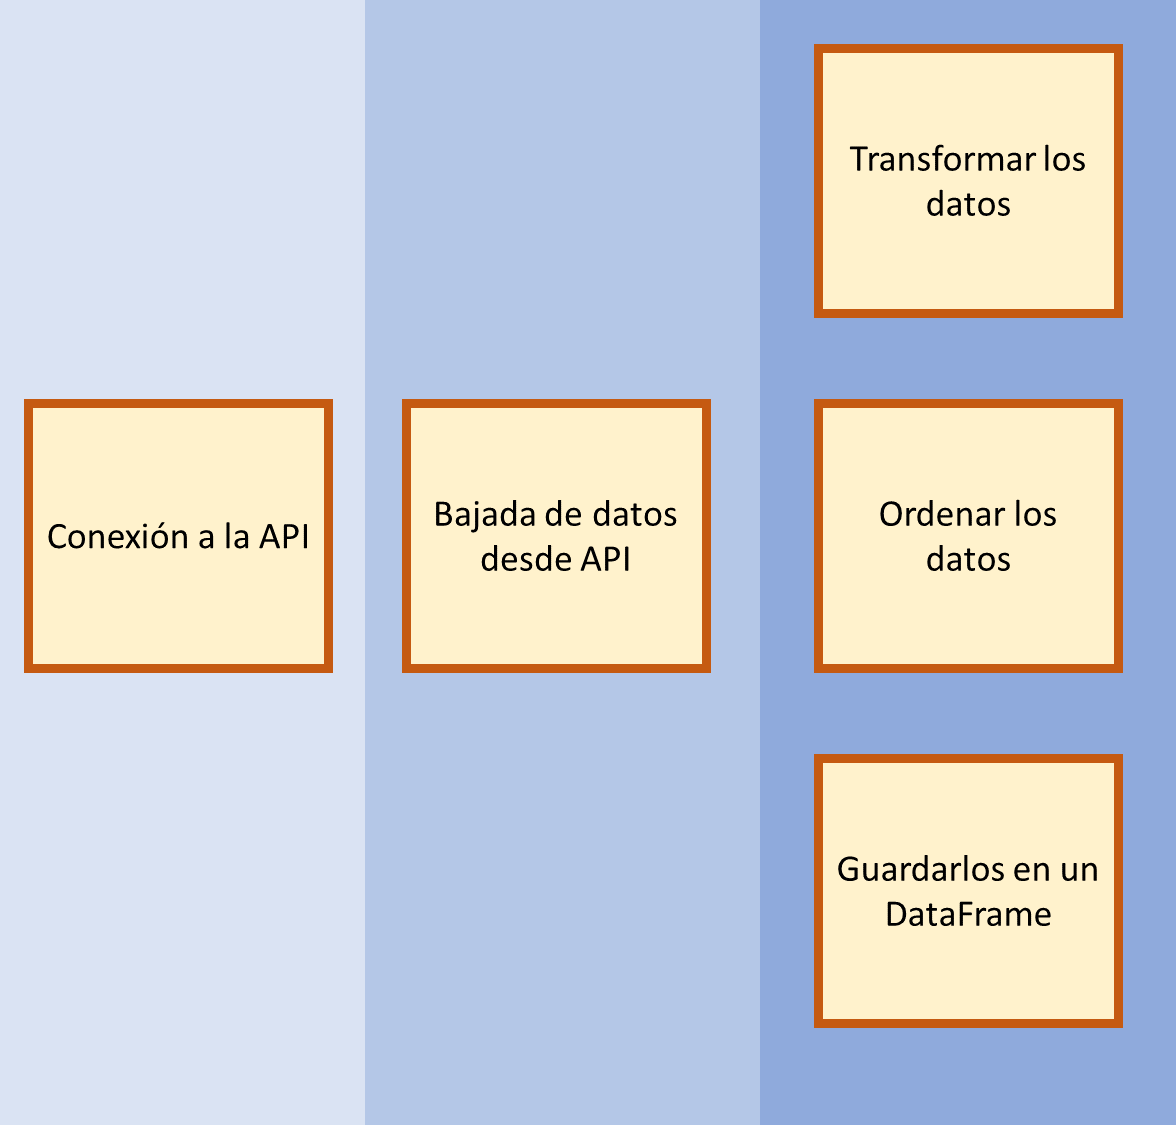

## Librerias 3.1

In [53]:
import json
import requests
import pandas as pd
import numpy as np

# Importamos las librerias para realizar los graficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Conexion a la API 3.2

In [2]:
key_admin = 'RGAPI-885a00b9-8257-46e5-9f9e-b9ce4b6a6793'

In [26]:
######################################################################################
######################################################################################

# Creamos una funcion que nos devuelva los datos del usuario en base al nombre de invocador

def datos_invocador(nombres_invocador:list)->pd.DataFrame:
    
    # Definimos algunas variables
    key = key_admin
    region = 'LA2'
    
    # Creamos la variable para almacenar 
    df_personal_infomation = pd.DataFrame()
    
    # Creamos un bucle for para que funcionen la lista de nombres a emplear.
    for nombre_invocador in nombres_invocador:
        
        # Conectamos a la API
        url = f'https://{region}.api.riotgames.com/lol/summoner/v4/summoners/by-name/{nombre_invocador}?api_key={key}' 
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Error: no se pudo obtener la maestría de campeones del invocador {nombre_invocador}.")
            return None

        # Lo transformamos en un texto
        texto = response.text

        # Lo transformamos en un JSON y lo normalizamos en un pd.df
        json_info = json.loads(texto)
        personal_infomation = pd.json_normalize(json_info)

        # Almacenamos los datos
        df_personal_infomation = pd.concat([df_personal_infomation, personal_infomation], ignore_index=True)

        print(f'Se finalizo el proceso de transformacion para {nombre_invocador}.')
    
    return df_personal_infomation

######################################################################################
######################################################################################

# Creamos una funcion que nos traigan el nivel de maestria del jugafor con cada campeon

def champions_mastery(nombres_invocador:list)->pd.DataFrame():
    
    data_summoner = information #Aqui deberemos de nombrar la var igual que el df que almacene los datos de los jugadores
    
    # Definimos algunas variables
    key = key_admin
    region = 'LA2'
    
    # Creamos un dataframe vacio
    df_summoner_mastery = pd.DataFrame()
    
    # Tenemos que obtener el id del dataframe obtenido anteriormente en base al nombre que ingresemos
    summoners_id = data_summoner[data_summoner['name'] == nombres_invocador]['id']
    
    # Creamos un bucle for para que tome todos los nombre que indiquemos
    for summoner_id in summoners_id:
    
        # Nos conectamos a la api para obtener los datos
        api_for_mastery = f'https://{region}.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/{summoner_id}?api_key={key}'

        response = requests.get(api_for_mastery)
        if response.status_code != 200:
            print(f"Error: no se pudo obtener la maestría de campeones del invocador {summoner_id}.")
            return None

        # Lo transformamos en un texto
        texto = response.text

        # Lo transformamos en un JSON y lo normalizamos en un pd.df
        json_info = json.loads(texto)
        mastery_information = pd.json_normalize(json_info)

        # Almacenamos los datos
        df_summoner_mastery = pd.concat([df_summoner_mastery, mastery_information], ignore_index=True)

        print(f'Se finalizo el proceso de transformacion para {summoner_id}.')
        
    # Trabajamos los datos para que nos traiga como columna tambien el nombre del invocador
    df_summoner_mastery.rename(columns={'summonerId':'id'}, inplace = True)
    df_summoner_mastery = df_summoner_mastery.merge(data_summoner[['name', 'id']], on='id', how='left')
    
    return df_summoner_mastery

######################################################################################
######################################################################################

# Definimos una funcion que nos traiga los datos de los personajes segun la version de juego

def champions_information(version:str)->pd.DataFrame:
    
    # version = 13.5.1
    # Definimos el url junto a nuestra version como variable 
    url_champions_information = f'http://ddragon.leagueoflegends.com/cdn/{version}/data/en_US/champion.json'
    
    # Nos conectamos a la api para obtener los datos
    response = requests.get(url_champions_information) 
    if response.status_code != 200:
        print("Error: no se puedo conectar correctamente a la api, controlar version del juego")
        return None
    
    # Lo transformamos en un texto
    texto = response.text
    
    # Lo transformamos en un json y comenzamos a extraer los distintos datos
    json_info = json.loads(texto)
    
    # Convertimos los diccionarios anidados de "info" y "stats" en columnas separadas
    champions_data = []
    for champion_id, champion_data in json_info["data"].items():
        champion_data["id"] = champion_id
        champion_data.update(champion_data.pop("stats"))
        champion_data.update(champion_data.pop("info"))
        champions_data.append(champion_data)

    # Creamos el DataFrame
    champions_data = pd.DataFrame(champions_data)
    champions_data.drop(columns="image", inplace=True)

    return champions_data

######################################################################################
######################################################################################

# Definimos una funcion que nos traiga el id de las partidas que vamos a usar

def historial_partidas(nombre_invocador:str)->list:
    
    # En base al nombre del invocador deberemos conectarnos a sus datos y obtener el puuid
    puuid = list(datos_invocador([nombre_invocador])["puuid"])[0]
    
    # Definimos alguna variables
    start_time = 1577880000
    type_game = "ranked"
    start = 0 
    count = 100
    match_ids = []
    
    # Creamos el bucle
    # Hacer solicitudes GET a la API hasta que no haya más resultados disponibles
    while True:
        # Hacer solicitud GET a la API
        response = requests.get(f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?startTime={start_time}&type={type_game}&start={start}&count={count}&api_key={key_admin}")

        # Verificar si la solicitud fue exitosa
        if response.status_code != 200:
            print("Error al hacer la solicitud")
            break
        else:
            # Obtener la lista de Id de partida a partir de la respuesta JSON
            new_match_ids = response.json()

            # Si no hay más resultados disponibles, salir del bucle
            if len(new_match_ids) == 0:
                break
            else:
                # Agregar los nuevos Id de partida a la lista
                match_ids += new_match_ids

                # Incrementar el valor de "start" para obtener los próximos resultados
                start += count

    # Ordenar la lista de Id de partida por fecha de manera ascendente
    match_ids.sort(reverse=False)
    
    id_games = match_ids

    return id_games

######################################################################################
######################################################################################

### Eliminamos la columna que nos complica todco ###
# Definimos una funcion que nos devuelva el detalle de nuestra partida en base al id de la misma

def detalle_partidas(id_partida:str)->pd.DataFrame:
    
    # Establecemos una coneccion con la API para extraer los datos
    url = f"https://americas.api.riotgames.com/lol/match/v5/matches/{id_partida}?api_key={key_admin}"
    
    try:
        # Establecemos la coneccion con la api
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Error al obtener los datos de la partida {partida}.")
        else:
            None

        # Convertimos el json
        json_info = json.loads(response.text)

        # Comenzamos a transformar el json en un df
        match_information = pd.DataFrame(json_info['info']['participants'])
        
        # Reiniciamos el índice para evitar índices duplicados
        match_information.reset_index(drop=True, inplace=True)

        # Nos fijamos si existe la columna challenges
        if 'challenges'in match_information.columns: 

            # Desglozamos la columna que quedo como un diccionario
            match_information.drop(['challenges'], axis=1, inplace = True)
            
        else:
            None

        # Eliminamos las columnas que no nos sirven
        match_information.drop(['perks'], axis=1, inplace = True)

        # Establecemos una columna con el nombre del id de la partida
        match_information['id_game'] = id_partida
        print(f"Se finalizo el proceso para la partida {id_partida}")

        return match_information
    
    except Exception as e:
        print(f"Error al obtener los datos de la partida {id_partida}: {e}")
        return pd.DataFrame()

######################################################################################
######################################################################################

# Creamos una funcion que actue como bucle for
def detalle_partidas_lista(lista_partidas):
    # Creamos un DataFrame vacío para ir almacenando los resultados
    df_resultados = pd.DataFrame()
    
    # Iteramos sobre cada elemento de la lista
    for partida in lista_partidas:
        # Llamamos a la función detalle_partidas() para obtener el detalle de la partida actual
        detalle_partida = detalle_partidas(partida).reset_index(drop=True)
        
        # Concatenamos el resultado al DataFrame de resultados
        df_resultados = pd.concat([df_resultados, detalle_partida])
    
    # Devolvemos el DataFrame final con los detalles de todas las partidas
    return df_resultados.reset_index()

######################################################################################
######################################################################################

# Creamos una funcion que nos devuelva los detalles de challenges para aquellas partidas en donde exista.
def detalle_challenge_partida(id_partidas: list[str]) -> pd.DataFrame:
    # Definir un DataFrame vacío para almacenar la información de todas las partidas
    df_todas_las_partidas = pd.DataFrame()
    
    # Establecemos la conexión a la API
    for id_partida in id_partidas:
        url = f"https://americas.api.riotgames.com/lol/match/v5/matches/{id_partida}?api_key={key_admin}"
        try:
            # Nos conectamos a la API
            response = requests.get(url)
            if response.status_code != 200:
                print(f"Error al obtener los datos de la partida {id_partida}.")
            else:
                None

            # Convertimos el json
            json_info = json.loads(response.text)

            # Comenzamos a transformar el json en un df
            match_information = pd.DataFrame(json_info['info']['participants'])

            # Reiniciamos el índice para evitar índices duplicados
            match_information.reset_index(drop=True, inplace=True)

            # Evaluamos la existencia de la columna challenge
            if 'challenges' in match_information.columns:

                # Desenglozamos los archivos
                df_challenges = pd.json_normalize(match_information['challenges'])

                # Le creamos la columna con el id de la partida
                df_challenges['id_game'] = id_partida
                df_challenges['summonerId'] = match_information['summonerId']

            # En caso de no existir que no haga nada
            else:
                print(f"No se encontraron datos sobre la columna challenges para {id_partida}")
                df_challenges = pd.DataFrame()

            # Concatenar el DataFrame temporal con el DataFrame vacío
            df_todas_las_partidas = pd.concat([df_todas_las_partidas, df_challenges], ignore_index=True)

        except Exception as e:
            # Que nos tire un error por no traer los datos
            print(f"Error al obtener los datos de la partida {id_partida}: {e}")
            
    # Devolver el DataFrame que contiene la información de todas las partidas
    return df_todas_las_partidas

######################################################################################
######################################################################################

## Bajada de datos desde la API 3.3

In [28]:
# Extraemos los datos del jugador
information = datos_invocador(['GC Darius Brando'])

# Extraemos los datos de las maestrias de los campeones que usa el jugador
maestrias_campeones = champions_mastery('GC Darius Brando')

# Extraemos la informacion sobre el campeon del parche actual
informacion_campeones = champions_information('13.5.1')

# Extraemos el historial de partidas para el jugador
id_partidas = historial_partidas('GC Darius Brando')

# Traemos todas las partidas sin la columna challenges
games_information = detalle_partidas_lista(id_partidas)

#Traemos tambien la parte challenges por otro lado
challenges_data = detalle_challenge_partida(id_partidas)

# Unimos challenges con las partidas sin el mismo
df_games = games_information.merge(challenges_data, on=['id_game','summonerId'], how='left')

Se finalizo el proceso de transformacion para GC Darius Brando.


## Almacenamiento de datos 3.4

In [46]:
# Definimos la ruta de almacenamiento
path = 'data/'

# Descargamos cada uno de los df para no tener que esperar que se corra el proceso anterior cada vez que desiemos trabjar
information.to_csv(path+'information.csv', index=False)
maestrias_campeones.to_csv(path+'maestrias_campeones.csv', index=False)
informacion_campeones.to_csv(path+'informacion_campeones.csv', index=False)
(pd.DataFrame({'lista':id_partidas})).to_csv(path+'id_partidas.csv', index=False)
games_information.to_csv(path+'games_information.csv', index=False)
challenges_data.to_csv(path+'challenges_data.csv', index=False)
df_games.to_csv(path+'df_games.csv', index=False)

In [5]:
# Cargamos todos los dataframe desde los csv para trabajar de manera mas eficaz la promixa
information = pd.read_csv('data/information.csv')
maestrias_campeones = pd.read_csv('data/maestrias_campeones.csv')
informacion_campeones = pd.read_csv('data/informacion_campeones.csv')
id_partidas = (pd.read_csv('data/id_partidas.csv'))['lista'].tolist()
games_information = pd.read_csv('data/games_information.csv')
challenges_data = pd.read_csv('data/challenges_data.csv')
df_games = pd.read_csv('data/df_games.csv')

C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\2799268752.py:8: DtypeWarning: Columns (106) have mixed types. Specify dtype option on import or set low_memory=False.
  df_games = pd.read_csv('data/df_games.csv')


# 4. Exploratory data analysis 

In [6]:
######################################################################################
######################################################################################

# Definimos algunos datos que vamos a definir para trabajar
def historial_del_jugador(nombre_jugador:str)->pd.DataFrame:
    # Extraemos el id del jugador
    id_del_jugador = df_games[df_games['summonerName'] == nombre_jugador]['summonerId'].unique().item()
    
    # Ahora con el id nos quedamos unicamente con las partidas que deseamos
    historial_partidas = df_games[df_games['summonerId'] == id_del_jugador]
    
    return historial_partidas

######################################################################################
######################################################################################

In [7]:
games_from_GCDariusBrando = df_games[df_games['summonerId'] == 'K2twAA5gA-gMXY4YVq0szKaX-er9Hlhz8sitMu4lzN00Qw']
games_from_GCDariusBrando.to_csv('testeo.csv', index=False)

C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\1034942628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champ_names.rename(columns={'key':'championId', 'name':'champ_name'}, inplace=True)


<AxesSubplot:xlabel='champ_name', ylabel='championPoints'>

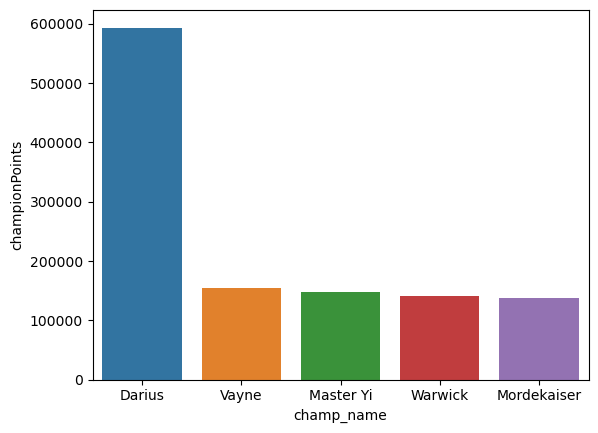

In [12]:
# # Controlamos un poco los datos para saber que podemos graficar en base a los datos
# print(maestrias_campeones.info())

# Le agregamos la columna del nombre a los campeones
champ_names = informacion_campeones[['key', 'name']]
champ_names.rename(columns={'key':'championId', 'name':'champ_name'}, inplace=True)
maestrias_campeones = maestrias_campeones.merge(champ_names, on='championId', how='left')

# Creamos un grafico de barras con los datos del usuario
sns.barplot(x='champ_name',
            y='championPoints',
            data=maestrias_campeones.nlargest(5, 'championPoints'))

En este grafico podemos ver los personajes, de ahora en mas llamaremos campeones, que mas emplea el jugador a lo largo de sus partidas. Aqui podemos ver el nombre de dichos campeones en donde luego podemos ver cuales son las caracteristicas de dichos campeones en el df de informacion_campeones. 

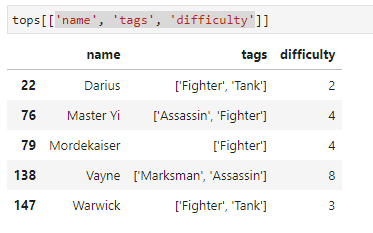

Como podemos ver el jugador juega mayormente con campeones 'Fighter' y 'Assassins' con niveles de dificultad mayormente bajo.

([<matplotlib.patches.Wedge at 0x21f747048e0>,
 [Text(-1.099625141967287, -0.028714929103596635, 'Perdio'),
  Text(1.099625141967287, 0.0287149291035965, 'Gano')],
 [Text(-0.5997955319821564, -0.015662688601961797, '50.8%'),
  Text(0.5997955319821564, 0.015662688601961725, '49.2%')])

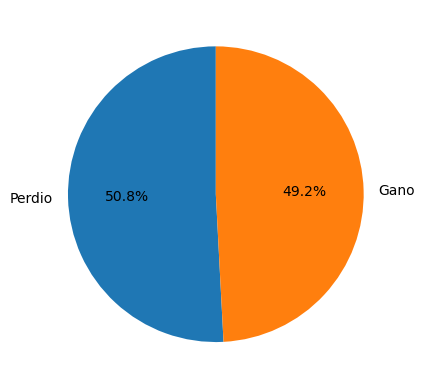

In [13]:
# Creamos un grafico de torta con los datos de victoria y derrota del jugador
Cantidad_victorias = games_from_GCDariusBrando['win'].value_counts()

# Graficamos los datos
plt.pie(Cantidad_victorias, labels=['Perdio', 'Gano'], autopct='%1.1f%%', startangle=90)

Como podemos visualizar del grafico superior, el jugador tiene un porcenataje de victorias y derrotas muy parejo, llegando casi a un 50% en ambos casos. Lo que podemos ver es que el desempeño del mismo es bastante irregular dado que podemos asumir que de cada 2 partidas por lo menos gana 1.

<AxesSubplot:xlabel='role', ylabel='individualPosition'>

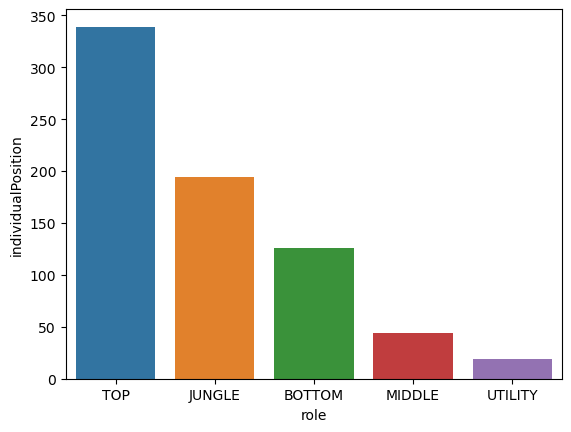

In [14]:
position = pd.DataFrame(games_from_GCDariusBrando['individualPosition'].value_counts()).reset_index().rename(columns={'index':'role'})

sns.barplot(x='role', y='individualPosition', data=position)

De las partidas que juega el jugador, en su mayoria observamos que va __TOP__ seguido por __JUNGLE__ y __BOTTOM__. De esta forma podemos concluir que el jugador tiene preferencia por jugar en la linea de TOP y en caso de no poder, juega como JUNGLE o BOTTOM. Pero... ¿Si queremos realizar un doble click en estas partidas veremos algun cambio en el comportamiento del jugador?¿Veremos si juega mejor en alguna linea que otra?

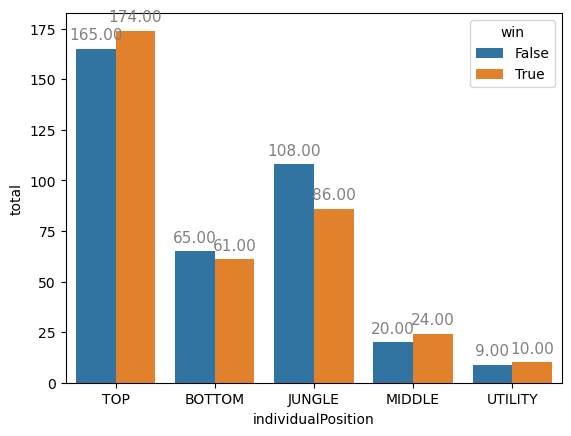

In [15]:
# Veremos la cantidad de veces que el jugador jugo en cada una de las lineas
# Generamos un df vacio para almacenar los datos
wins_role = pd.DataFrame()

# Generamos los roles
roles = games_from_GCDariusBrando['individualPosition'].unique()

# Creamos un loop que guarde cada rol
for role in roles:
    
    # Seleccionamos el rol de la linea
    wins = pd.DataFrame(games_from_GCDariusBrando[games_from_GCDariusBrando['individualPosition'] == role][['win','individualPosition']]
             .value_counts()).reset_index().rename(columns={0:'total'})
    
    # Almacenamos los datos
    wins_role = pd.concat([wins_role, wins], ignore_index=True)

    
ax = sns.barplot(x='individualPosition', y='total', hue='win', data=wins_role)

# Agregamos los valores de cada barra
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')

# Mostramos el gráfico
plt.show()

Como se pudo observar anteriormente, el porcentaje de victoria del jugador en cada linea es muy similar a lo que habiamos hablado anteriormente. Podemos ver una variedad en las lineas de __TOP__ y de __JUNGLE__, en donde vemos que tiene mayor taza de victoria como TOP que como JUNGLE. Por otro lado si analizamos __BOTTOM, MIDDLE & UTILITY__ vemos que el jugador tiene casi el 50% de victorias y derrotas en las lineas.

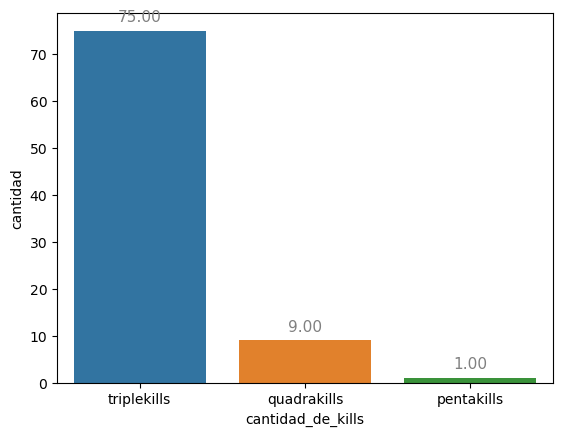

In [16]:
# Generamos un df que nos diga la cantidad de veces que el jugador haya generado una quadra o una pentakill
dic = {'triplekills':games_from_GCDariusBrando[games_from_GCDariusBrando['tripleKills'] != 0]['id_game'].count(), 'quadrakills':games_from_GCDariusBrando[games_from_GCDariusBrando['quadraKills'] != 0]['id_game'].count(), 'pentakills'
 :games_from_GCDariusBrando[games_from_GCDariusBrando['pentaKills'] != 0]['id_game'].count()}
dic = pd.DataFrame.from_dict(dic, orient='index').reset_index().rename(columns={0:'cantidad', 'index':'cantidad_de_kills'})

# Ahora generaremos un grafico de barras
ax= sns.barplot(x='cantidad_de_kills', y='cantidad', data=dic)

# Agregamos los valores de cada barra
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')
    
plt.show()

Considerando que estamos analizando más de 700 partidas podemos asumir tres cosas en base a las mismas:

- El jugador realiza una triple kill en el 10% de sus partidas.
- El jugador realiza un asesinato cuadruple en el 1.2% de sus partidas.
- El jugador no frecuenca pentakills dado que vemos que en mas de 700 partidas, unicamente posee uno.

C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\3900138888.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_linea['valor_uni'] = valores_unicos
C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\3900138888.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_linea['farm_min'] = farm_linea['totalMinionsKilled']/(farm_linea['timePlayed']/60)
C:\Users\Hugo\miniconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items 

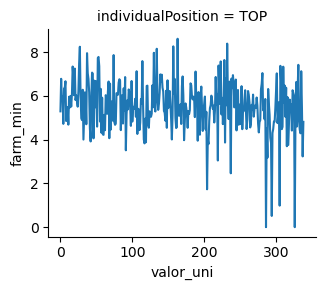

C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\3900138888.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_linea['valor_uni'] = valores_unicos
C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\3900138888.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_linea['farm_min'] = farm_linea['totalMinionsKilled']/(farm_linea['timePlayed']/60)
C:\Users\Hugo\miniconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items 

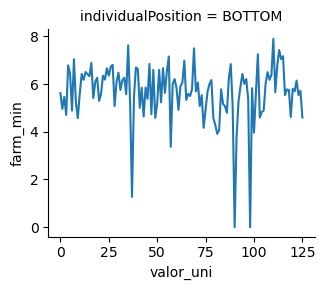

C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\3900138888.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_linea['valor_uni'] = valores_unicos
C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\3900138888.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_linea['farm_min'] = farm_linea['totalMinionsKilled']/(farm_linea['timePlayed']/60)
C:\Users\Hugo\miniconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items 

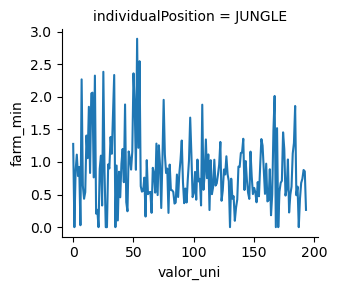

C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\3900138888.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_linea['valor_uni'] = valores_unicos
C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\3900138888.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_linea['farm_min'] = farm_linea['totalMinionsKilled']/(farm_linea['timePlayed']/60)
C:\Users\Hugo\miniconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items 

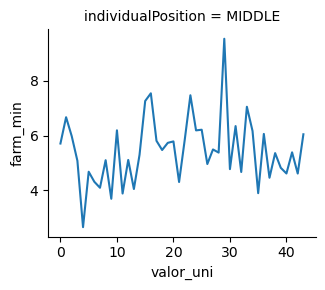

C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\3900138888.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_linea['valor_uni'] = valores_unicos
C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\3900138888.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_linea['farm_min'] = farm_linea['totalMinionsKilled']/(farm_linea['timePlayed']/60)
C:\Users\Hugo\miniconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items 

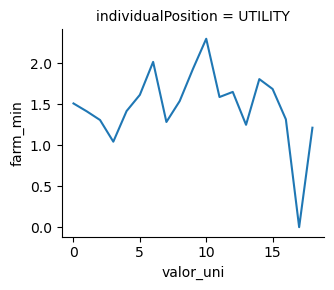

In [18]:
# Crearemos un df para transformar los datos
cols = ['individualPosition', 'win', 'totalMinionsKilled', 'timePlayed']
minions = games_from_GCDariusBrando[cols]

# Creamos un bucle que nos genere un grafico para cada una de las lineas.
for role in roles:
    
    # Seleccionamos el df a usar
    farm_linea = minions[minions['individualPosition'] == role]
    
    # Una vez que tenemos el df que nos genere una columna con un valor unico para cada fila
    num_filas = len(farm_linea)
    valores_unicos = range(num_filas)
    farm_linea['valor_uni'] = valores_unicos
    farm_linea['farm_min'] = farm_linea['totalMinionsKilled']/(farm_linea['timePlayed']/60)
    
    # Crear una cuadrícula de subplots con un subplot por cada rol
    g = sns.FacetGrid(data=farm_linea, col='individualPosition', col_wrap=3)

    # Aplicar la función sns.lineplot() a cada subplot de la cuadrícula
    g.map(sns.lineplot, x='valor_uni', y='farm_min', data=farm_linea)

    # Mostrar los gráficos
    plt.show()

En este juego tenemos diversas formas de obtener oro, el cual sirve para mejorar a nuestro campeon y hacerlo mas fuerte. Algunas de esas metodologias son: asesinatos, destruir torres o farmear minions/subditos. Para ello es de vital importancia la precision del jugador de realizar el ultimo golpe en el momento justo, lo que llamaos last hit. Entonces en base a esto, decidimos evaluar el farmeo del jugador en cada linea de juego. Lo que calculamos fue el farmeo por minuto del jugador para de esta forma tener una comparacion mas real entre las distintas lineas.
- __TOP__ : Vemos que es una linea en la que el jugador posee mucha experiencia dado que suele tener multiples partidas con un farmXmin de 8 o por lo general tiene una media entre 5 y 6. En esta linea que ademas de ser la que mas juega el jugador vemos que es de las que mejor domina.
- __BOTTOM__ : Se ve que el jugador domina la linea con multiples partidas con un farmXmin de 7 pero teniendo generalmente la media en 6.
- __JUNGLE__ :La linea pareciera indicar que no requiere mucho de farmeo dado que observamos que la media del farmXmin baja muchisimo en comparacion a ls otras con una media entre 0.5 y 1.
- __MIDDLE__ : Para las pocas partidas que posee el jugador vemos que la media ronda entre un farmXmin de 5.
- __UTILITY__ : Para la cantidad reducida de partidas que vemos hay aproximadamente un farmXmin de 1. Observamos que la linea no requiere del farmeo para conseguir oro o no es una de las fortalezas del jugador.

C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\1871037560.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kda_x_line['valor_uni'] = valores_unicos
C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\1871037560.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kda_x_line['kda'] = (kda_x_line['kills'] + kda_x_line['assists'])/kda_x_line['assists']
C:\Users\Hugo\miniconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items 

La mediana del KDA para la linea de TOP es de 2.14.


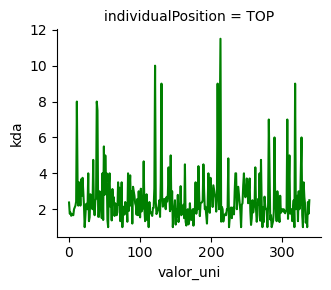

La mediana del KDA para la linea de BOTTOM es de 1.88.


C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\1871037560.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kda_x_line['valor_uni'] = valores_unicos
C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\1871037560.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kda_x_line['kda'] = (kda_x_line['kills'] + kda_x_line['assists'])/kda_x_line['assists']
C:\Users\Hugo\miniconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items 

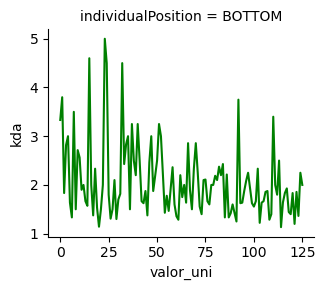

C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\1871037560.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kda_x_line['valor_uni'] = valores_unicos
C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\1871037560.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kda_x_line['kda'] = (kda_x_line['kills'] + kda_x_line['assists'])/kda_x_line['assists']
C:\Users\Hugo\miniconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items 

La mediana del KDA para la linea de JUNGLE es de 2.11.


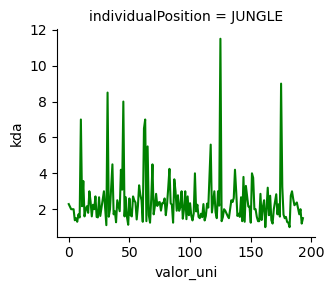

La mediana del KDA para la linea de MIDDLE es de 2.33.


C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\1871037560.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kda_x_line['valor_uni'] = valores_unicos
C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\1871037560.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kda_x_line['kda'] = (kda_x_line['kills'] + kda_x_line['assists'])/kda_x_line['assists']
C:\Users\Hugo\miniconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items 

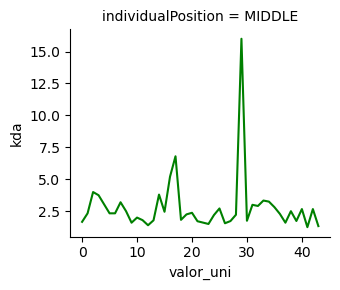

C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\1871037560.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kda_x_line['valor_uni'] = valores_unicos
C:\Users\Hugo\AppData\Local\Temp\ipykernel_6996\1871037560.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kda_x_line['kda'] = (kda_x_line['kills'] + kda_x_line['assists'])/kda_x_line['assists']


La mediana del KDA para la linea de UTILITY es de 1.33.


C:\Users\Hugo\miniconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


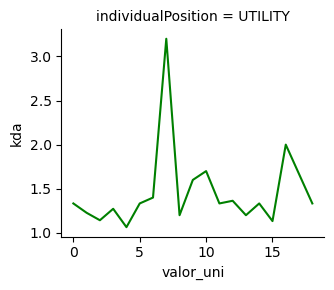

In [51]:
# Crearemos un df para transformar los datos
cols = ['win', 'kills', 'deaths', 'assists', 'individualPosition']
game_kda = games_from_GCDariusBrando[cols]

# Creamos un bucle que nos genere un grafico para cada una de las lineas.
for role in roles:
    
    # Seleccionamos el df a usar
    kda_x_line = game_kda[game_kda['individualPosition'] == role]
    
    # Una vez que tenemos el df que nos genere una columna con un valor unico para cada fila
    num_filas = len(kda_x_line)
    valores_unicos = range(num_filas)
    kda_x_line['valor_uni'] = valores_unicos
    
    # Calculamos el kda de cada juego
    kda_x_line['kda'] = (kda_x_line['kills'] + kda_x_line['assists'])/kda_x_line['assists']
    kda_meadiana = round(kda_x_line['kda'].median(), 2)
    
    # Crear una cuadrícula de subplots con un subplot por cada rol
    g = sns.FacetGrid(data=kda_x_line, col='individualPosition', col_wrap=3)

    # Aplicar la función sns.lineplot() a cada subplot de la cuadrícula
    print(f'La mediana del KDA para la linea de {role} es de {kda_meadiana}.')
    g.map(sns.lineplot, x='valor_uni', y='kda', data=kda_x_line, color='green')

    # Mostrar los gráficos
    plt.show()

Una medida para medir la habilidad de juego del jugador es la que se llama el KDA, en donde se mide los asesinatos, asistencias y muertes que tuvo el jugador a lo largo de una partida. Segun informacion del juego, un KDA promedio se ubica en un valor de 3, por debajo de este diremos que es pobre y caso contrario es un KDA mayor.

Gracias a lo mencionado anteriormente podemos ver que el jugador posee un KDA inferior al promedio de jugadores. Si observamos la mediana de las lineas, podemos ver que el mejor desempeño del jugador es en la linea de MIDDLE, que se puede deber a la poca cantidad de partidas al mismo tiempo. Luego vemos que las lienas que mas domina estan en segundo lugar con una diferencia de 0.03 nada mas que esta asociado a las lineas de TOP y JUNGLE. Por ultimo, se ve claramente como las lineas que no frecuenta son las peores, refiriendonos a la de BOT y UTILITY.

<AxesSubplot:xlabel='individualPosition', ylabel='visionScore'>

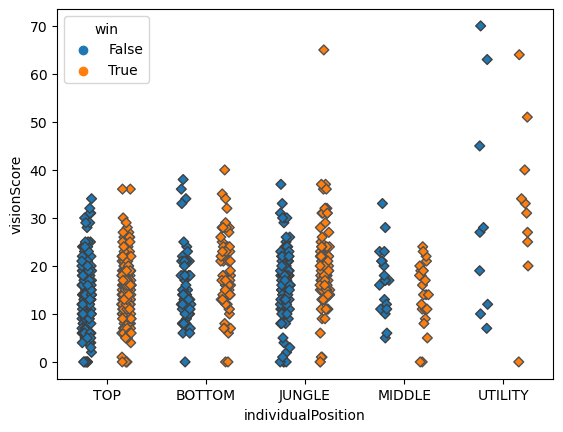

In [50]:
# Seleccionamos los datos que vamos a usar
games_from_GCDariusBrando

# Realziamos el grafico
sns.stripplot(x='individualPosition',
              y='visionScore',
              linewidth=1,
              marker='D',
              hue='win',
              dodge=True,
              data=games_from_GCDariusBrando)

En el juego hay un factor importante que es la vision en el mapa. Para ello estan objetos llamados ward que brindan vision en el mapa. Cuando uno pone vision en el mapa con los wards, tiene mayor probabilidad de ver cuando el equipo enemigo viene en conjunto para atacarte. De esta forma, a mayor visibilidad, mayor probabilidad de planificar tu tecnica de juego.

En base a lo que hablamos anteriormente, podemos ver que la mayoria de las partidas en las que el jugador gano tiene un puntaje de vision mas alto respecto a las que perdio. De esta forma vemos que la vision es un factor a tomar en cuenta a la hora de planificar la estrategia de juegon para lograr ganar.

In [60]:
fig = px.line_polar(games_from_GCDariusBrando, r='visionScore', theta='individualPosition', line_close=True, markers=True)
fig.update_traces(fill = 'toself')


fig.show()

C:\Users\Hugo\miniconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# 5. Data wrangling 

# 6. Feature selection 

# 7. Machine learning 

# 8. Conclusiones 

# 9. Futuras lineas